# chapter 07 선형회귀 기초

## 04 경사하강법으로 선형회귀 풀기

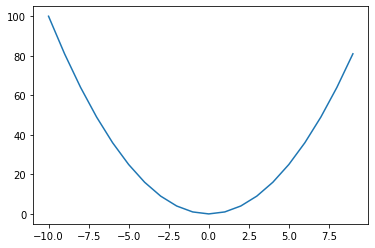

In [1]:
# x**2의 값을 가지는 f(x)
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,1)
f_x=x**2

plt.plot(x,f_x)
plt.show()

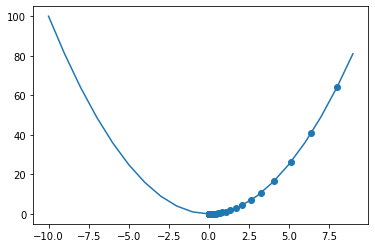

In [2]:
# 경사하강법이 작동되면서 x가 최솟값을 찾아가는 경로
x_new=10
derivative=[]
y=[]
learng_rate=0.1

for i in range(100):
    old_value=x_new
    derivative.append(old_value-learng_rate*2*old_value)
    x_new=old_value-learng_rate*2*old_value
    y.append(x_new**2)

plt.plot(x,f_x)
plt.scatter(derivative,y)
plt.show()

## 05 선형회귀 성능 측정하기

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5, 2)),range(5) # x범위, y범위
X_train,X_test,y_train ,y_test = train_test_split(X, y,test_size =0.33, random_state =42)

In [5]:
print(X_train)
print(y_train)

[[4 5]
 [0 1]
 [6 7]]
[2, 0, 3]


In [6]:
print(X_test)
print(y_test)

[[2 3]
 [8 9]]
[1, 4]


In [9]:
from sklearn.metrics import mean_absolute_error

y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
mean_absolute_error(y_true,y_pred) # MAE

0.5

In [10]:
from sklearn.metrics import mean_squared_error

y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
np.sqrt(mean_squared_error(y_true,y_pred)) # RMSE

0.6123724356957945

In [11]:
from sklearn.metrics import r2_score

y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
r2_score(y_true,y_pred)

0.9486081370449679

# chapter 08 선형회귀 심화

## 03 사이킷런을 이용한 선형회귀

In [12]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
boston.keys()

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [13]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
x_data=boston.data
y_data=boston.target.reshape(boston.target.size,1)
y_data.shape

(506, 1)

In [17]:
from sklearn import preprocessing

minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data)
x_scaled_data=minmax_scale.transform(x_data)
x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled_data,y_data,test_size=0.33)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [23]:
from sklearn import linear_model
regr=linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=8)
lasso_regr=linear_model.Lasso(alpha=0.01,fit_intercept=True,normalize=False,copy_X=True)
ridge_regr=linear_model.Ridge(alpha=0.01,fit_intercept=True,normalize=False,copy_X=True)
SGD_regr=linear_model.SGDRegressor(penalty='12',alpha=0.01,max_iter=1000,tol=0.001,eta0=0.01)

In [25]:
regr.fit(x_train,y_train)

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=8, normalize=False)

In [26]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-0.57868458  0.95907666  0.05793666  0.40419232 -1.2729661   4.71888551
  -0.29573048 -3.07496917  0.94386529 -0.95349247 -1.75180088  1.00909376
  -3.50252144]]
intercept:  [22.90980297]


In [27]:
regr.predict(x_data[:5])

array([[113.76122348],
       [122.85650627],
       [145.51662179],
       [169.59043147],
       [161.70779986]])

In [28]:
x_data[:5].dot(regr.coef_.T)+regr.intercept_

array([[113.76122348],
       [122.85650627],
       [145.51662179],
       [169.59043147],
       [161.70779986]])

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true=y_test.copy()
y_hat=regr.predict(x_test)


r2_score(y_true,y_hat),mean_absolute_error(y_true,y_hat),mean_squared_error(y_true,y_hat)

(0.6928453627808625, 3.5110679937708813, 24.25550025795126)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

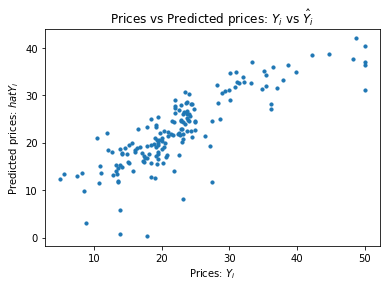

In [32]:
plt.scatter(y_true,y_hat,s=10)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $hat{Y}_i$')
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")